In [324]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [325]:
titanic_data = pd.read_csv('../../project/datasets/titanic/train.csv')

In [326]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [328]:
# Questions?
# 1. What was the percentage of survival for males vs females? for ex: 70% males survived, 62% females survived
# 2. Which class(ex: Business,Economy) suffered the maximum damages, in terms of casualties?
# 3. How many people travelled alone and how many travelled with family?
# 4. Which factors helped someone survive?

In [329]:
# To answer "Q1", below is the algorithm
# step 1: find total population on the ship
# step 2: verify if all of the data is legitimate/correct
# step 3: find the percentage of females and males
# step 4: find the total casualties (optional, incase required later)
# step 5: find percentage of total male casualties and same for females
# step 6: publish the results in a format(visualization) which easily explains the findings

In [330]:
# step 1 - find total
# how? count the total number of rows in the csv
total_passengers = len(titanic_data.index)
print 'The total number of passengers on the ship: ' + str(total_passengers)

The total number of passengers on the ship: 891


In [331]:
# step 2 - verify the correctness of data
# how? check if all the rows have passenger ids, if yes, then they must be unique
unique_passengers = len(titanic_data['PassengerId'].unique())
unique_passengers

891

In [332]:
## Above result shows that all the passengerIds are unique. 
# Why did we choose passengerId and not any other field?
# Familiarity with databases makes us think of a row as a tuple and in a tuple, there is a differenciating factor,
# that is called the primary key. This field cannot be null and uniquely identifies a tuple
# for ex: names, sex, age can be same for multiple people, but passesgerId will not be

In [333]:
## So now , lets go ahead with step 3
# step 3 - find percentage of females and males
# how? we know the total number of passengers, find no of males by differentiating w.r.t to sex,
# then females = total - no of males and then we calculate the respective percentages
list_of_males = np.where(titanic_data['Sex'] == 'male')
list_of_females = np.where(titanic_data['Sex'] == 'female')
no_of_males = list_of_males[0].size
no_of_females = total_passengers - no_of_males
print 'Total passengers: ' + str(total_passengers)
print 'Male passengers: ' + str(no_of_males)
print 'Female passengers: ' + str(no_of_females)

Total passengers: 891
Male passengers: 577
Female passengers: 314


In [334]:
print 'Percentage of males on the ship: ' + str(np.round((no_of_males/float(total_passengers))*100, 2))
print 'Percentage of females on the ship: ' + str(np.round((no_of_females/float(total_passengers))*100, 2))

Percentage of males on the ship: 64.76
Percentage of females on the ship: 35.24


In [335]:
# step 4: find the total casualties (optional)

In [336]:
list_of_casualties = np.where(titanic_data['Survived'] == 0)
no_of_casualties = len(list_of_casualties[0])
print 'Total casualties: ' + str(no_of_casualties)

Total casualties: 549


In [337]:
# step 5: find total male casualties and same for females

In [338]:
# for males => choose rows where survived = 0 and sex = male
# for females => choose rows where survived = 0 and sex = female
df = pd.DataFrame(titanic_data, columns=['PassengerId','Survived', 'Sex'])

In [339]:
males_not_survived_df = titanic_data[(titanic_data["Sex"] == 'male') & (titanic_data["Survived"] == 0)]
no_of_male_casualties = len(males_not_survived_df)

In [340]:
females_not_survived_df = titanic_data[(titanic_data["Sex"] == 'female') & (titanic_data["Survived"] == 0)]
len(females_not_survived_df)

81

In [341]:
print 'Total male casualties: ' + str(no_of_male_casualties)

Total male casualties: 468


In [342]:
print 'Total female casualties: ' + str(no_of_female_casualties)

Total female casualties: 81


In [343]:
# Percentage of male and female casualties
print 'Percentage of male casualties: ' + str(np.round((no_of_male_casualties/float(no_of_casualties))*100, 2))
print 'Percentage of female casualties: ' + str(np.round((no_of_female_casualties/float(no_of_casualties))*100, 2))

Percentage of male casualties: 85.25
Percentage of female casualties: 14.75


In [344]:
# Visualisation
total_casualties_df = titanic_data[titanic_data["Survived"] == 0]

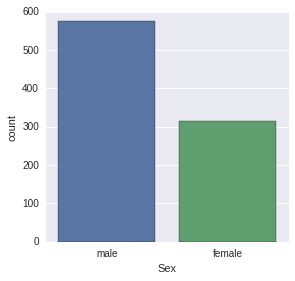

In [345]:
# graph showing male vs female onboards
sns.factorplot('Sex',data=titanic_data,kind="count")

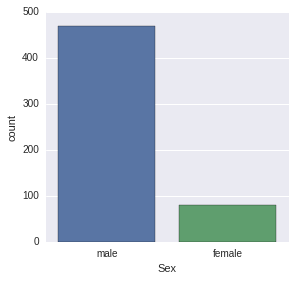

In [346]:
# graph showing male vs female casualties
sns.factorplot('Sex',data=total_casualties_df,kind="count")

In [347]:
# 2. Which class(ex: Business,Economy) suffered the maximum damages, in terms of casualties?
# To answer "Q2", below is the algorithm
# step 1: group the titanic_data dataframe into 3 sub df's
# 1. Pclass = 1
# 2. Pclass = 2
# 3. Pclass = 3
# step 2: further differentiate each w.r.t survived = 0 and survived = 1 and calculate the percentages
# step 3: visualize

In [348]:
# step 1: group the titanic_data dataframe into 3 sub df's
pclass_1_df = titanic_data[(titanic_data["Pclass"] == 1)]
pclass_2_df = titanic_data[(titanic_data["Pclass"] == 2)]
pclass_3_df = titanic_data[(titanic_data["Pclass"] == 3)]

In [349]:
print 'Total people in class 1: ' + str(len(pclass_1_df))
print 'Total people in class 2: ' + str(len(pclass_2_df))
print 'Total people in class 3: ' + str(len(pclass_3_df))

Total people in class 1: 216
Total people in class 2: 184
Total people in class 3: 491


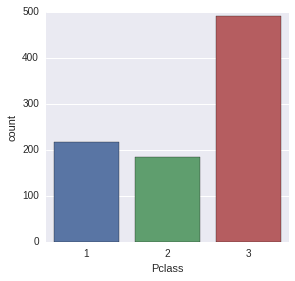

In [350]:
# total people in class 1, class 2, class 3
sns.factorplot('Pclass',data=titanic_data,kind="count")

In [351]:
# people in class 1 in terms of survival and non-survival
class_1_non_survival = len(pclass_1_df[(pclass_1_df["Survived"] == 0)])
print str(class_1_non_survival) + ' people from class 1 did not survive' 
class_1_survival = len(pclass_1_df[(pclass_1_df["Survived"] == 1)])
print str(class_1_survival) + ' people from class 1 survived'
# people in class 2 in terms of survival and non-survival
class_2_non_survival = len(pclass_2_df[(pclass_2_df["Survived"] == 0)])
print str(class_2_non_survival) + ' people from class 2 did not survive' 
class_2_survival = len(pclass_2_df[(pclass_2_df["Survived"] == 1)])
print str(class_2_survival) + ' people from class 2 survived'
# people in class 3 in terms of survival and non-survival
class_3_non_survival = len(pclass_3_df[(pclass_3_df["Survived"] == 0)])
print str(class_3_non_survival) + ' people from class 3 did not survive' 
class_3_survival = len(pclass_3_df[(pclass_3_df["Survived"] == 1)])
print str(class_3_survival) + ' people from class 3 survived'

80 people from class 1 did not survive
136 people from class 1 survived
97 people from class 2 did not survive
87 people from class 2 survived
372 people from class 3 did not survive
119 people from class 3 survived


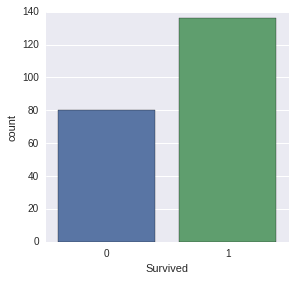

In [352]:
# class 1 w.r.t survival and non-survival
sns.factorplot('Survived',data=pclass_1_df,kind="count")

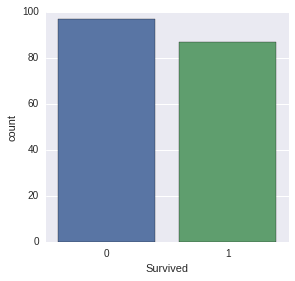

In [353]:
# class 2 w.r.t survival and non-survival
sns.factorplot('Survived',data=pclass_2_df,kind="count")

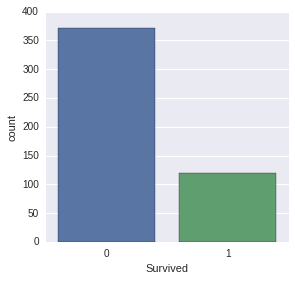

In [354]:
# class 3 w.r.t survival and non-survival
sns.factorplot('Survived',data=pclass_3_df,kind="count")

In [355]:
# Conclusion:
# From the graphs we can conclude that the rate of death is higher in terms of pclass = 3

In [356]:
# 3. How many people travelled alone and how many travelled with family?
# To answer "Q2", below is the algorithm
# step 1: 
# step 2: 

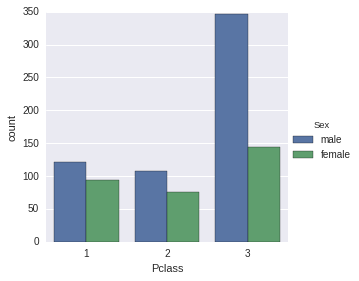

In [357]:
sns.factorplot('Pclass',data=titanic_data,hue='Sex',kind='count')